<a href="https://colab.research.google.com/github/ravishkamadushan/Research/blob/main/OWN_TRIAL_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -r DATA
!unzip "/content/drive/MyDrive/PROJECT/PUBLIC/SCRATCH DATASET/AlzheimerDatasetFull .zip" -d ./DATA

Streaming output truncated to the last 5000 lines.
  inflating: ./DATA/AlzheimerDatasetFull/VeryMildDemented/a231fefc-359b-40fc-b6aa-db4c3f3b51ac.jpg  
  inflating: ./DATA/AlzheimerDatasetFull/VeryMildDemented/a2479682-1520-4d4b-a819-0516809393db.jpg  
  inflating: ./DATA/AlzheimerDatasetFull/VeryMildDemented/a252d5dd-3e86-42c4-83bb-52031cf5b9ff.jpg  
  inflating: ./DATA/AlzheimerDatasetFull/VeryMildDemented/a2612e5a-c1f2-4781-803c-a6b471ded1b5.jpg  
  inflating: ./DATA/AlzheimerDatasetFull/VeryMildDemented/a261d715-f3f3-4e30-842a-2e5441f00955.jpg  
  inflating: ./DATA/AlzheimerDatasetFull/VeryMildDemented/a27aeaaf-b37f-4e15-ab3b-064daa19355b.jpg  
  inflating: ./DATA/AlzheimerDatasetFull/VeryMildDemented/a27da9a4-1ed4-493f-af81-dd8a3c8adda2.jpg  
  inflating: ./DATA/AlzheimerDatasetFull/VeryMildDemented/a280d3f6-c18d-424e-8f51-e924f5392c74.jpg  
  inflating: ./DATA/AlzheimerDatasetFull/VeryMildDemented/a28780ec-8fc0-4d55-9596-0ae2663c6da4.jpg  
  inflating: ./DATA/AlzheimerDatasetFull

In [ ]:
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, LeakyReLU, Dense, Dropout , Input
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import plot_model
import keras

In [ ]:
NUM_CLASSES = 4
BATCH_SIZE = 16
NUM_EPOCHS = 15

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
model = models.Sequential()

# Block 1
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3), name="conv2d_26"))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', name="conv2d_27"))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name="max_pooling2d_10"))

# Block 2
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', name="conv2d_28"))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', name="conv2d_29"))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name="max_pooling2d_11"))

# Block 3
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', name="conv2d_30"))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', name="conv2d_31"))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', name="conv2d_32"))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name="max_pooling2d_12"))

# Block 4
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', name="conv2d_33"))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', name="conv2d_34"))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', name="conv2d_35"))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name="max_pooling2d_13"))

# Block 5
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', name="conv2d_36"))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', name="conv2d_37"))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', name="conv2d_38"))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name="max_pooling2d_14"))

# Flatten and fully connected layers
model.add(layers.Flatten(name="flatten_2"))
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.002) , loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                                  

In [ ]:
file_url = "/content/DATA/AlzheimerDatasetFull"

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255. ,
    validation_split = 0.2
)

train = datagen.flow_from_directory(
    file_url,
    target_size = (224,224),
    class_mode="categorical",
    seed=1,
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset = "training"
)

test = datagen.flow_from_directory(
    file_url,
    target_size = (224,224),
    class_mode="categorical",
    seed=1,
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset = "validation"
)

Found 32308 images belonging to 4 classes.
Found 8076 images belonging to 4 classes.


In [ ]:
import os
print("Entire Dataset:")
for class_label, class_index in train.class_indices.items():
    class_path = os.path.join(file_url, class_label)
    num_images = len(os.listdir(class_path))
    print(f"Class {class_index} ({class_label}): {num_images} images")

Entire Dataset:
Class 0 (MildDemented): 9856 images
Class 1 (ModerateDemented): 6528 images
Class 2 (NonDemented): 12800 images
Class 3 (VeryMildDemented): 11200 images


In [ ]:
print(train.class_indices)

class_dict = {}
for k , v in train.class_indices.items():
    class_dict[v] = k

print(class_dict)

{'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}
{0: 'MildDemented', 1: 'ModerateDemented', 2: 'NonDemented', 3: 'VeryMildDemented'}


In [ ]:
x , y = train.next()

print(x.shape , y.shape)

(16, 224, 224, 3) (16, 4)


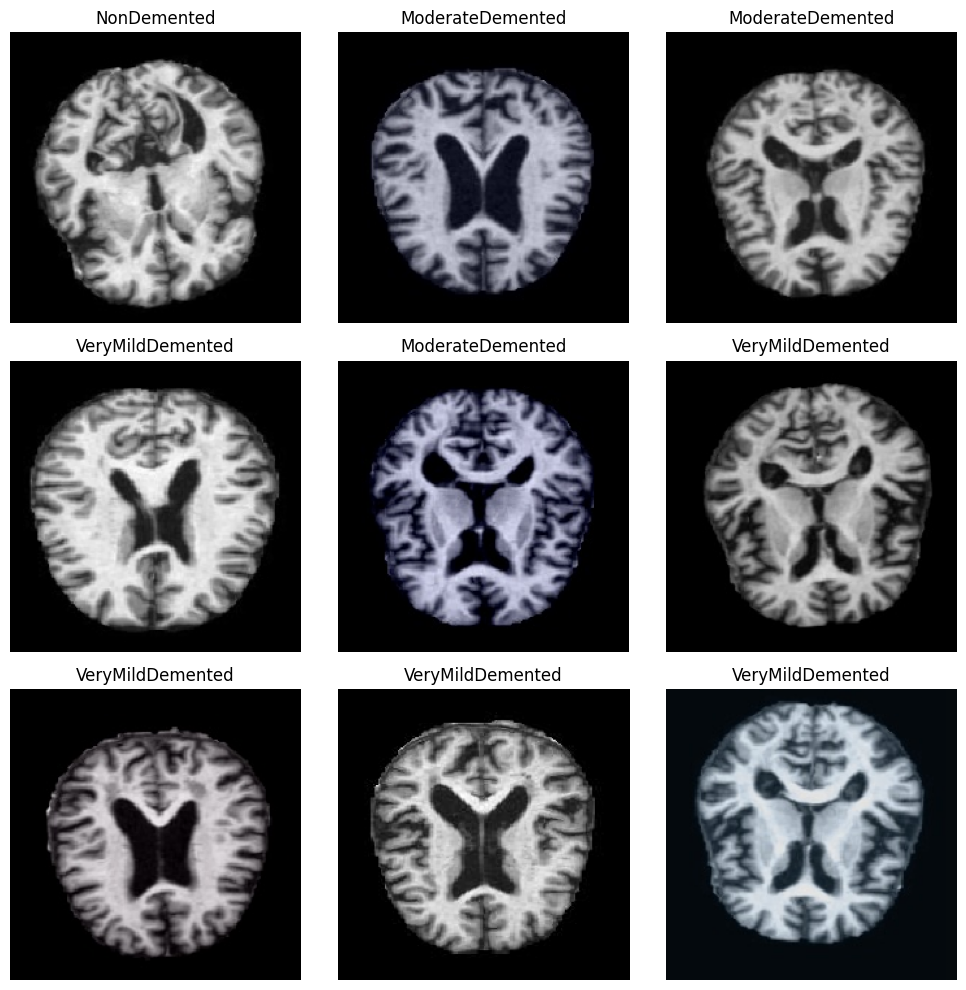

In [ ]:
import matplotlib.pyplot as plt


class_dict = {0: 'MildDemented', 1: 'ModerateDemented', 2: 'NonDemented', 3: 'VeryMildDemented'}

plot_data = train
x_batch, y_batch = next(plot_data)


fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

for i in range(min(9, len(x_batch))):
    axes[i].imshow(x_batch[i], cmap='gray')

    label_index = np.argmax(y_batch[i])

    if label_index in class_dict:
        class_label = class_dict[label_index]
    else:
        class_label = 'Unknown Class'

    axes[i].set_title(class_label)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_filepath = '/content/drive/MyDrive/PROJECT/SAVED MODELS/TRIAL 08/BEST MODEL/best_model.h5'
model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    save_best_only=True,
    monitor='loss',
    mode='min',
    verbose=1
)

In [ ]:

history = model.fit(
    train,
    epochs=NUM_EPOCHS,
    verbose=1,
    callbacks=[model_checkpoint]
)

Epoch 1/15
2020/2020 [==============================] - ETA: 0s - loss: 0.7191 - accuracy: 0.6902
Epoch 1: loss improved from inf to 0.71911, saving model to /content/drive/MyDrive/shiftdel/ALZ/SAVED MODELS/TRIAL 08/BEST MODEL/best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2020/2020 [==============================] - 170s 80ms/step - loss: 0.7191 - accuracy: 0.6902
Epoch 2/15
2020/2020 [==============================] - ETA: 0s - loss: 0.3964 - accuracy: 0.8371
Epoch 2: loss improved from 0.71911 to 0.39641, saving model to /content/drive/MyDrive/shiftdel/ALZ/SAVED MODELS/TRIAL 08/BEST MODEL/best_model.h5
2020/2020 [==============================] - 160s 79ms/step - loss: 0.3964 - accuracy: 0.8371
Epoch 3/15
2020/2020 [==============================] - ETA: 0s - loss: 0.2629 - accuracy: 0.8980
Epoch 3: loss improved from 0.39641 to 0.26292, saving model to /content/drive/MyDrive/shiftdel/ALZ/SAVED MODELS/TRIAL 08/BEST MODEL/best_model.h5
2020/2020 [==============================] - 159s 79ms/step - loss: 0.2629 - accuracy: 0.8980
Epoch 4/15
2020/2020 [==============================] - ETA: 0s - loss: 0.2220 - accuracy: 0.9157
Epoch 4: loss improved from 0.26292 to 0.22203, saving model to /content/drive/MyDrive/shiftdel/ALZ/SAVED MODELS/TRIAL 08/BEST MOD

##Final model report

In [ ]:
from sklearn.metrics import classification_report

y_true = test.classes

y_pred = model.predict(test)
y_pred_classes = np.argmax(y_pred, axis=1)

class_labels = list(test.class_indices.keys())



report = classification_report(y_true, y_pred_classes, target_names=class_labels)

print(report)

505/505 [==============================] - 36s 72ms/step
                  precision    recall  f1-score   support

    MildDemented       0.98      0.97      0.98      2028
ModerateDemented       0.98      0.97      0.97      1990
     NonDemented       0.97      0.97      0.97      2012
VeryMildDemented       0.98      0.97      0.97      2046

        accuracy                           0.97      8076
       macro avg       0.97      0.97      0.97      8076
    weighted avg       0.97      0.97      0.97      8076



Loss


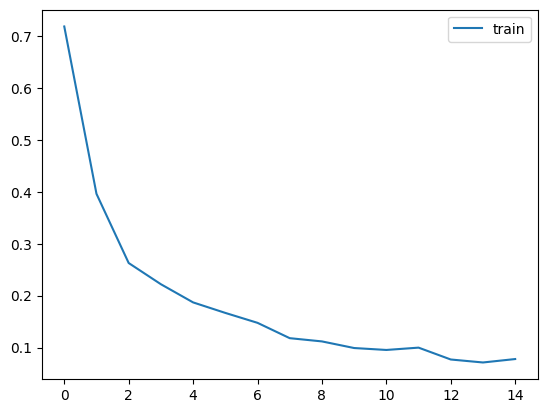

In [ ]:
from matplotlib import pyplot as plt
print("Loss")
plt.plot(history.history['loss'], label ='train')
plt.legend()
plt.show()

Accuracy


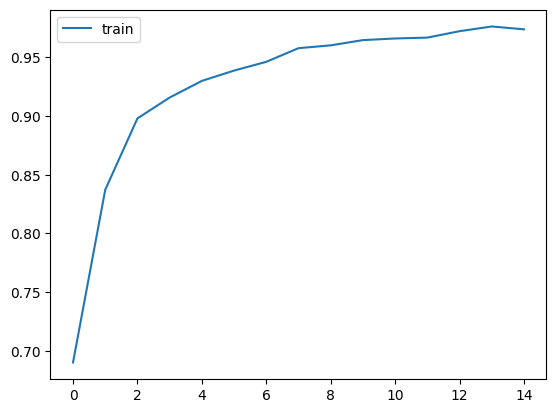

In [ ]:
print("Accuracy")
plt.plot(history.history['accuracy'], label ='train')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/PROJECT/SAVED MODELS/TRIAL 08/fs_trail_08_model.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
predict_model = load_model("/content/drive/MyDrive/PROJECT/SAVED MODELS/TRIAL 08/BEST MODEL/best_model.h5")

## Best model report

In [ ]:
from sklearn.metrics import classification_report

true_labels = test.classes

y_pred = predict_model.predict(test)
predicted_labels = np.argmax(y_pred, axis=1)


class_labels = list(test.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=class_labels)

print(report)

505/505 [==============================] - 37s 73ms/step
                  precision    recall  f1-score   support

    MildDemented       0.97      0.98      0.98      2059
ModerateDemented       0.97      0.98      0.98      2034
     NonDemented       0.98      0.98      0.98      2027
VeryMildDemented       0.98      0.98      0.98      1956

        accuracy                           0.98      8076
       macro avg       0.98      0.98      0.98      8076
    weighted avg       0.98      0.98      0.98      8076



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels,predicted_labels, average='weighted')
conf_matrix = confusion_matrix(true_labels, predicted_labels)

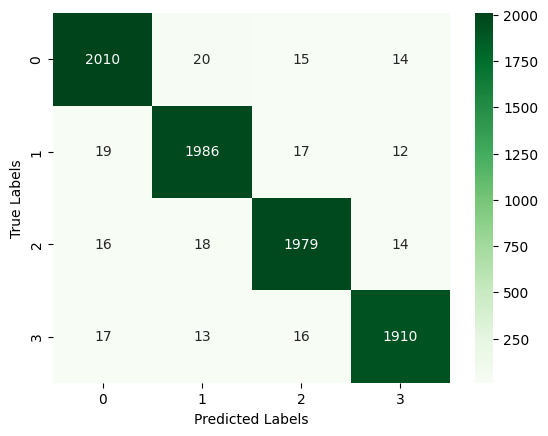

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
class_labels = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

In [ ]:
new_image_path = '/content/DATA/AlzheimerDatasetFull/MildDemented/002cb9c1-b160-4c76-b7e4-5fb2f1b527f7.jpg'
img = image.load_img(new_image_path, target_size=(224, 224))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make the prediction
predictions = predict_model.predict(img_array)




predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class_label)

1/1 [==============================] - 2s 2s/step
Predicted Class: MildDemented


In [ ]:
new_image_path = '/content/DATA/AlzheimerDatasetFull/ModerateDemented/00a4080b-0cea-436f-9c97-031ee6d3b5f5.jpg'
img = image.load_img(new_image_path, target_size=(224, 224))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make the prediction
predictions = predict_model.predict(img_array)




predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class_label)

1/1 [==============================] - 0s 65ms/step
Predicted Class: ModerateDemented


In [ ]:
new_image_path = '/content/DATA/AlzheimerDatasetFull/NonDemented/00c69c46-4fce-42e2-94d6-f5f39c802c5a.jpg'
img = image.load_img(new_image_path, target_size=(224, 224))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make the prediction
predictions = predict_model.predict(img_array)




predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class_label)

1/1 [==============================] - 0s 32ms/step
Predicted Class: NonDemented


In [ ]:
new_image_path = '/content/DATA/AlzheimerDatasetFull/VeryMildDemented/016144e2-7acd-49b0-aaa4-1f08a3af3ddd.jpg'
img = image.load_img(new_image_path, target_size=(224, 224))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make the prediction
predictions = predict_model.predict(img_array)




predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class_label)

1/1 [==============================] - 0s 28ms/step
Predicted Class: VeryMildDemented
